# Multiple Linear Regression

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_beer = pd.read_csv('bases/consumo_cerveja.csv',nrows=365,delimiter=';')
df_beer.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29.799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28.900


In [17]:
from sklearn.model_selection import train_test_split #para criar conjunto de treino e teste
#alterando nome das colunas para facilitar manipulação
df_beer = df_beer.rename(columns={'Temperatura Media (C)':'meanTemp','Temperatura Minima (C)':'minTemp','Temperatura Maxima (C)':'maxTemp',
                       'Precipitacao (mm)':'precip','Final de Semana':'weekend','Consumo de cerveja (litros)':'consumo'})

#selecionando as colunas serem usadas como features para treinar o modelo
#selecionando a coluna meta, ou seja, aquela que eu quero predizer
feature_col = ['maxTemp','precip','weekend']
meta_col = ['consumo']

X = df_beer[feature_col].values
y = df_beer[meta_col].values.ravel()



In [18]:
y

array([25.461, 28.972, 30.814, 29.799, 28.9  , 28.218, 29.732, 28.397,
       24.886, 37.937, 36.254, 25.743, 26.99 , 31.825, 25.724, 29.938,
       37.69 , 30.524, 29.265, 35.127, 29.13 , 25.795, 21.784, 28.348,
       31.088, 21.52 , 29.972, 22.603, 22.696, 26.845, 27.03 , 32.057,
       24.097, 31.655, 24.738, 19.95 , 22.821, 28.893, 29.926, 24.062,
       21.137, 26.805, 26.389, 24.219, 30.231, 24.968, 25.343, 17.399,
       21.392, 22.922, 24.567, 30.943, 30.825, 25.692, 26.959, 25.366,
       22.784, 26.241, 26.467, 27.475, 28.749, 24.146, 22.988, 30.3  ,
       22.654, 29.09 , 24.619, 20.016, 23.042, 22.933, 22.409, 21.281,
       28.844, 32.872, 20.903, 26.275, 20.167, 23.628, 24.213, 28.631,
       25.855, 21.406, 21.617, 22.401, 27.989, 24.974, 29.76 , 26.116,
       25.85 , 24.925, 21.979, 22.116, 24.867, 33.45 , 32.713, 22.356,
       21.004, 23.362, 20.298, 24.862, 30.505, 25.07 , 22.62 , 22.001,
       23.469, 21.735, 21.593, 33.822, 28.028, 24.304, 31.108, 19.113,
      

In [19]:
split_test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [9]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [20]:
#separando os dados em conjunto de treino e teste
#treinando o modelo
mlr_skl = linear_model.LinearRegression()
mlr_skl.fit(X_train, y_train.ravel()) # flatten arrays

LinearRegression()

In [21]:
mlr_skl.coef_  #valores finais de theta

array([ 0.66752499, -0.05305718,  5.33497184])

In [22]:
y_pred = mlr_skl.predict(X_test) # predizando
print(mean_squared_error(y_test,y_pred)) # MSE


5.480853459612662


In [26]:
y_pred

array([25.5541415 , 27.07130999, 28.11812711, 21.61574405, 27.32462467,
       17.73421627, 22.48352654, 18.87889158, 18.051333  , 20.88146656,
       32.15210511, 26.88919148, 25.24055058, 25.84854213, 20.61445656,
       22.35002154, 28.09073647, 27.09284136, 24.68635901, 28.88653837,
       34.5605008 , 22.01625904, 29.70779574, 19.26100071, 25.01489341,
       24.81986401, 29.22030086, 29.95980645, 22.87120826, 24.21909152,
       24.45055214, 29.88782585, 28.22424147, 32.55570399, 23.61831902,
       27.28447838, 27.48996398, 23.62757067, 25.02012151, 31.62339083,
       27.89047897, 32.29091582, 27.94139194, 24.54762592, 24.81614895,
       31.75689583, 24.75311151, 24.79701447, 26.10838888, 29.23164091,
       29.22030086, 31.77712322, 31.75689583, 33.9597283 , 20.34744656,
       25.8211515 , 31.35638084, 30.75869223, 26.59357011, 24.31631853,
       22.38493973, 27.98462211, 24.82775587, 23.41520851, 29.09202396,
       29.6048987 , 25.1536265 , 19.75542797, 20.14718906, 23.95

In [23]:
#testando com novas amostras
pred_value = [[35,0,0]]
mlr_skl.predict(pred_value)

array([29.75954895])

In [45]:
pred_value

[[35, 0, 0]]

# Regression Trees

In [34]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
import re
import numpy as np

In [35]:
df = pd.read_csv('bases/auto-mpg.csv')

In [36]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [37]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [38]:
# Eliminando valores '?'
# re.sub('?', np.nan, df['horsepower'])
# df['horsepower'].fillna(df['horsepower'].median(), inplace=True)
df = df[df['horsepower']!='?']

In [39]:
features = ['horsepower', 'weight']
# Garantindo que estão no formato correto
for ft in features:
    df[ft] = pd.to_numeric(df[ft])
# Construindo matriz de features e vetor de true labels
X = df[features]
y = df['mpg'].values.tolist()

In [41]:
# Instanciando
reg = DecisionTreeRegressor(max_depth=2, min_samples_split=3)

In [42]:
# Fit
reg.fit(X,y)

DecisionTreeRegressor(max_depth=2, min_samples_split=3)

In [43]:
# Visualizando
print(tree.export_text(reg))

|--- feature_1 <= 2764.50
|   |--- feature_0 <= 70.50
|   |   |--- value: [33.68]
|   |--- feature_0 >  70.50
|   |   |--- value: [27.01]
|--- feature_1 >  2764.50
|   |--- feature_0 <= 127.00
|   |   |--- value: [20.67]
|   |--- feature_0 >  127.00
|   |   |--- value: [14.72]



In [44]:
#predict
reg.predict([['300','4000']])

C:\Users\dougl\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([14.72142857])

# Prunning

In [46]:
# vamos usar um dataset diferente para entender o processo de prunning
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

In [47]:
#separando o arquivo em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [48]:
#Calculando Cost Complecity Pruning
# Aqui, vou usar Decision Tree Classifier, voltado para classificação, apenas para fins didáticos. O processo é o mesmo para regressão
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train,y_train)

In [49]:
path

{'ccp_alphas': array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
        0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
        0.02314163, 0.03422475, 0.32729844]),
 'impurities': array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
        0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
        0.10634033, 0.14056508, 0.46786352])}

In [50]:
# obtendo valores de alpha e impureza
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

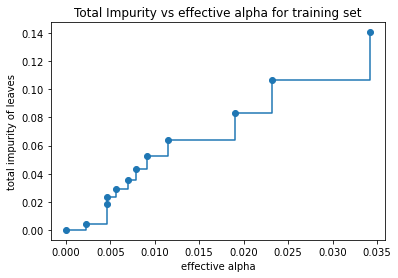

In [51]:
# plot
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [52]:
# Treinando a árvore com diferentes valores de alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


In [53]:
# eliminando o último elemento de clfs e ccp_alphas por que representa a árvore com apenas uma folha
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

In [54]:
clfs

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0022664723976040134, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004647426339100881, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004659799593581376, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005633802816901408, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007042253521126761, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007841938420144537, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.009114019793328328, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.011443661971830986, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.018988002086593604, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.023141627543035996, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.03422474765119576, random_state=0)]

In [55]:
#Obtendo os scores para cada valor de aplha
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

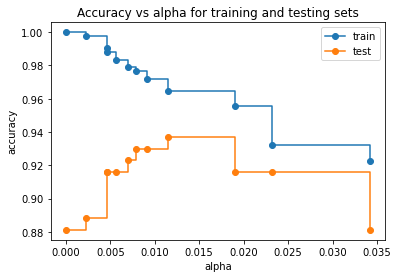

In [56]:
#plotando
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()